In [10]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [11]:
# Store filepath in a variable
flu_vacc_file1= "Data/NYVacc2015-16CalcData.csv"
flu_vacc_file2= "Data/NYVacc2016-17CalcData.csv"

In [12]:
vacc15_16 = pd.read_csv(flu_vacc_file1)
vacc16_17 = pd.read_csv(flu_vacc_file2)
vacc16_17.head()

,Month,Percentage,Sample_Size
0,Jul 2016,0.0045,46338
1,Aug 2016,0.0211,46338
2,Sep 2016,0.0998,46338
3,Oct 2016,0.2633,46338
4,Nov 2016,0.3526,46338


In [13]:
vacctotal = [vacc15_16, vacc16_17]
mergetotal = pd.concat(vacctotal)
mergetotal.head()

,Month,Percentage,Sample_Size
0,Jul 2015,0.0053,50801
1,Aug 2015,0.0181,50801
2,Sep 2015,0.0912,50801
3,Oct 2015,0.2596,50801
4,Nov 2015,0.3578,50801


In [14]:
#Calculate the percent change in vaccinations from month to month.
mergetotal['Change']=mergetotal.Percentage.pct_change()
#mergetotal.to_csv("NYVacc2015-17.csv")

In [15]:
#Read in new vacc file with added column
flu_vacc_file4= "Data/NYVacc2015-17.csv"
vacc15_17 = pd.read_csv(flu_vacc_file4)
vacc15_17.head()

,Month_Short,Month,Percentage,Sample_Size,Change
0,15-Jul,7/1/2015,0.0053,50801,NaN
1,15-Aug,8/1/2015,0.0181,50801,2.415094
2,15-Sep,9/1/2015,0.0912,50801,4.038674
3,15-Oct,10/1/2015,0.2596,50801,1.846491
4,15-Nov,11/1/2015,0.3578,50801,0.378274


In [16]:
#Convert "Month" column to same date-time format as the other so they can be merged
vacc15_17['Month'] = pd.to_datetime(vacc15_17['Month'], format="%m/%d/%Y")
vacc15_17.head()

,Month_Short,Month,Percentage,Sample_Size,Change
0,15-Jul,2015-07-01,0.0053,50801,NaN
1,15-Aug,2015-08-01,0.0181,50801,2.415094
2,15-Sep,2015-09-01,0.0912,50801,4.038674
3,15-Oct,2015-10-01,0.2596,50801,1.846491
4,15-Nov,2015-11-01,0.3578,50801,0.378274


In [17]:
#Read in FLu Incidents file and check for accuracy
flu_incid= "Data/ILINet_2015_2017.csv"
fluout = pd.read_csv(flu_incid)
fluout.head()

,REGION TYPE,REGION,YEAR,WEEK,WkStart,WkEnd,Mo_of_yr,MoY,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,New York,2015,40,10/5/2015,10/11/2015,October,10/1/2015,X,0.588433,X,X,X,X,X,X,70,80,11896
1,States,New York,2015,41,10/12/2015,10/18/2015,October,10/1/2015,X,0.557203,X,X,X,X,X,X,62,80,11127
2,States,New York,2015,42,10/19/2015,10/25/2015,October,10/1/2015,X,0.859620,X,X,X,X,X,X,115,82,13378
3,States,New York,2015,43,10/26/2015,11/1/2015,October,10/1/2015,X,0.816171,X,X,X,X,X,X,107,83,13110
4,States,New York,2015,44,11/2/2015,11/8/2015,November,11/1/2015,X,0.655665,X,X,X,X,X,X,89,84,13574


In [18]:
#Extract useful information from CSV file and put into new dataframe.
ili_groupby = fluout.groupby(['MoY'])
sum_ili = pd.DataFrame(ili_groupby['ILITOTAL'].sum())
sum_ili.index = sum_ili.index.to_datetime()
sorted_ili = sum_ili.sort_index(ascending=True)

C:\Users\BenG\Anaconda3\envs\PythonDATA\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


In [19]:
#Reset the index of the new sorted dataframe, change the column name, and check it out
sortedILI =sorted_ili.reset_index()
sortedILI = sortedILI.rename(columns={"index": "Month"})
sortedILI.head()

,Month,ILITOTAL
0,2015-10-01,354
1,2015-11-01,423
2,2015-12-01,673
3,2016-01-01,619
4,2016-02-01,924


In [20]:
#Merge the two dataframes into one (Be one with the force Luke!)
merge_table = pd.merge(vacc15_17, sortedILI, on="Month")
merge_table.head()

,Month_Short,Month,Percentage,Sample_Size,Change,ILITOTAL
0,15-Oct,2015-10-01,0.2596,50801,1.846491,354
1,15-Nov,2015-11-01,0.3578,50801,0.378274,423
2,15-Dec,2015-12-01,0.3922,50801,0.096143,673
3,16-Jan,2016-01-01,0.4191,50801,0.068587,619
4,16-Feb,2016-02-01,0.4353,50801,0.038654,924


In [51]:
#Create a variable for the x-axis and variables for y axis data 
x_axis = np.arange(len(merge_table))
x_axis
percchange = merge_table["Change"]
inctotals = merge_table["ILITOTAL"]
monthinfo = merge_table["Month"]
monthinfo.head()

0   2015-10-01
1   2015-11-01
2   2015-12-01
3   2016-01-01
4   2016-02-01
Name: Month, dtype: datetime64[ns]

C:\Users\BenG\Anaconda3\envs\PythonDATA\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


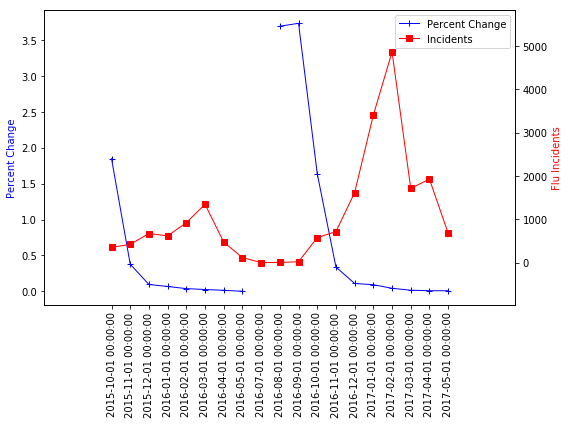

In [66]:
fig = plt.figure(figsize=(8, 6))
plt.xticks(x_axis, monthinfo, rotation= 'vertical')
ax1 = fig.add_subplot(111)
plot1, = ax1.plot(x_axis, percchange, marker="+", color="blue", linewidth=1, label="Percent Change")
ax1.set_ylabel('Percent Change', color='b')


ax2 = ax1.twinx()
plot2, = ax2.plot(x_axis, inctotals, marker="s", color="Red", linewidth=1, label="Incidents")
ax2.set_ylabel('Flu Incidents', color='r')
plt.legend(handles=[plot1, plot2], loc="best")
#for tl in ax2.get_yticklabels():
 #   tl.set_color('r')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

#Save Plot and Display
plt.tight_layout()
plt.savefig("VaccineVSOutbreak.png")
plt.show()

